In [1]:
import pandas as pd

bxdf = pd.read_csv('G_box.mets.tsv',sep='\t', names=['chr', 'position', 'strand', 'mets', 'nomets', 'context', 'boxID', 'side'])

FileNotFoundError: [Errno 2] File G_box.mets.tsv does not exist: 'G_box.mets.tsv'

In [19]:
import pandas as pd
# pd.set_option('display.max_rows', None)

bxdf = pd.read_csv(
    'GCC_box.metsrep2acc1.tsv',
    sep='\t', 
    names=['chr', 'position', 'strand', 'mets', 'nomets', 'context', 'boxID', 'side'],
    usecols=['mets', 'nomets', 'context', 'boxID', 'side']
                  )


bxdfCHH = bxdf[(bxdf['context'] == 'CHH') & (bxdf['mets'] + bxdf['nomets'] >= 4)]
bxdfCHG = bxdf[(bxdf['context'] == 'CHG') & (bxdf['mets'] + bxdf['nomets'] >= 4)]
bxdfCGbox = bxdf[(bxdf['context'] == 'CG')]

# bxdfCGGboxgroup = bxdfCGbox.groupby('boxID').sum()

# bxdfCHHbox = bxdfCHH[bxdfCHH['side'] == 'box']
# bxdfCHHsides = bxdfCHH[(bxdfCHH['side'] == 'box_right') | (bxdfCHH['side'] == 'box_left')]

# bxdfCHGbox = bxdfCHG[bxdfCHG['side'] == 'box']
# bxdfCHGsides = bxdfCHG[(bxdfCHG['side'] == 'box_right')| (bxdfCHG['side'] == 'box_left')]

# bxdfCGbox = bxdfCG[bxdfCG['side'] == 'box']
# bxdfCGsides = bxdfCG[(bxdfCG['side'] == 'box_right') | (bxdfCG['side'] == 'box_left')]

bxdfCGGboxgroup = bxdfCGbox.groupby('boxID').sum()
bxdfCGGboxgroup['Result'] = bxdfCGGboxgroup['mets'] / (bxdfCGGboxgroup['nomets'] + bxdfCGGboxgroup['mets'])

# bxdfCHGbox.df.groupby('boxID')
# bxdfCGGboxgroup

In [10]:
bxdfCGbox

,mets,nomets,context,boxID,side
0,0,11,CG,GCC00001,box
2,0,0,CG,GCC00001,box
3,0,11,CG,GCC00001,box
8,0,0,CG,GCC00001,box_right
14,2,1,CG,GCC00002,box
...,...,...,...,...,...
174100,0,2,CG,GCC14107,box
174105,0,1,CG,GCC14107,box_right
174106,0,1,CG,GCC14107,box_left
174107,0,2,CG,GCC14107,box_left


In [20]:
bxdfCGGboxgroup

,mets,nomets,Result
boxID,,,
GCC00001,0,22,0.000000
GCC00002,10,4,0.714286
GCC00003,0,40,0.000000
GCC00004,0,43,0.000000
GCC00005,24,2,0.923077
...,...,...,...
GCC14103,0,18,0.000000
GCC14104,0,10,0.000000
GCC14105,0,18,0.000000


In [3]:
import pandas as pd
# pd.set_option('display.max_rows', None)

files = ['GCC_box.metsrep2mock1.tsv', 'GCC_box.metsrep2mock6.tsv', 'GCC_box.metsrep2mock24.tsv']
# files = ['GCC_box.metsrep2ja1.tsv', 'GCC_box.metsrep2ja6.tsv', 'GCC_box.metsrep2ja24.tsv']
files = ['GCC_box.metsrep2acc1.tsv', 'GCC_box.metsrep2acc6.tsv', 'GCC_box.metsrep2acc24.tsv']
datareadyrep = {}

for file in files:

    datareadyrep[file] = {}
    bxdf = pd.read_csv(
        file,
        sep='\t', 
        names=['chr', 'position', 'strand', 'mets', 'nomets', 'context', 'boxID', 'side'],
        usecols=['mets', 'nomets', 'context', 'boxID', 'side']
                      )

    csPosibilities = ['CG', 'CHG', 'CHH']

    for cContext in csPosibilities:
        bxdfCX = bxdf[(bxdf['context'] == cContext) & (bxdf['mets'] + bxdf['nomets'] >= 4)]
#         print(bxdfCX)
        bxdfCX = bxdfCX[bxdfCX['side'] == 'box']
        bxdfCX.to_csv('JAJJAJAJA' +cContext + '_' + file[:-9], sep='\t', index=False)
#         bxdfCX = bxdfCX[(bxdfCX['side'] == 'box_right')| (bxdfCX['side'] == 'box_left')]
#         bxdfCXgrouped = bxdfCX.groupby('boxID').sum()
#         bxdfCXgrouped['Result'] = bxdfCXgrouped['mets'] / (bxdfCXgrouped['nomets'] + bxdfCXgrouped['mets'])
#         datareadyrep[file][cContext] =  bxdfCXgrouped['Result'].mean()
#         datareadyrep[file][cContext] =  bxdfCXgrouped['Result'].sort_values(ascending=False).to_numpy()
#         print(bxdfCXgrouped[bxdfCXgrouped['Result'].isna()])

print(datareadyrep)

{'GCC_box.metsrep2acc1.tsv': {}, 'GCC_box.metsrep2acc6.tsv': {}, 'GCC_box.metsrep2acc24.tsv': {}}


['GCC_box.metsrep2acc1.tsv', 'GCC_box.metsrep2acc6.tsv', 'GCC_box.metsrep2acc24.tsv']


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

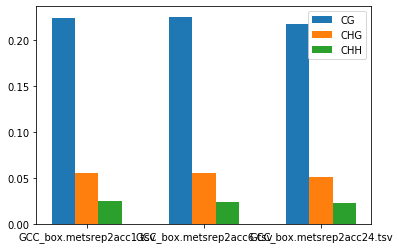

In [7]:
import matplotlib.pyplot as plt
import numpy as np



labels = list(datareadyrep.keys())
print(labels)
chhs = [datareadyrep[experiment]['CHH'] for experiment in labels]
cgs = [datareadyrep[experiment]['CG'] for experiment in labels]
chgs = [datareadyrep[experiment]['CHG'] for experiment in labels]


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, cgs, width, label='CG')
rects2 = ax.bar(x,chgs, width, label='CHG')
rects3 = ax.bar(x + width,  chhs, width, label='CHH')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data

all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']
print (all_data)
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# # rectangular box plot
# bplot1 = ax1.boxplot(all_data,
#                      vert=True,  # vertical box alignment
#                      patch_artist=True,  # fill with color
#                      labels=labels)  # will be used to label x-ticks
# ax1.set_title('Rectangular box plot')

# # notch shape box plot
# bplot2 = ax2.boxplot(all_data,
#                      notch=True,  # notch shape
#                      vert=True,  # vertical box alignment
#                      patch_artist=True,  # fill with color
#                      labels=labels)  # will be used to label x-ticks
# ax2.set_title('Notched box plot')

# # fill with colors
# colors = ['pink', 'lightblue', 'lightgreen']
# for bplot in (bplot1, bplot2):
#     for patch, color in zip(bplot['boxes'], colors):
#         patch.set_facecolor(color)

# # adding horizontal grid lines
# for ax in [ax1, ax2]:
#     ax.yaxis.grid(True)
#     ax.set_xlabel('Three separate samples')
#     ax.set_ylabel('Observed values')

# plt.show()

[array([ 1.04930431,  0.86609917,  0.5511346 ,  1.72807779, -0.64928812,
       -0.47841958,  1.07788511,  0.96881033, -0.80934479, -1.2373891 ,
        1.86011654, -0.30831924,  0.78297055,  0.02152345,  0.71566379,
        1.40146651, -1.12750212,  1.65581822,  1.40096148,  0.20199007,
       -0.96486356,  1.04458851, -0.43105069, -0.4973195 , -0.05911742,
       -1.11460467, -1.22699779, -1.41008819,  1.31086051, -0.51744207,
       -0.01665814,  0.46917225,  0.77677809, -1.88469769, -0.12758733,
       -0.51931744,  0.73514322,  1.34685132,  0.55025505, -0.22905116,
        0.66123163, -0.53636847, -0.48194438,  0.31272356, -3.12183853,
       -1.35847701, -0.14263821, -0.21699693, -0.032868  ,  1.83214468,
        0.35235984,  0.23664513,  1.47854807,  1.55430657, -1.11060898,
        0.82378856,  0.66527469,  0.71476639, -1.23078705,  2.09540213,
       -0.60321948,  1.61355306, -0.25398405, -1.51587877, -0.11722652,
        0.49542836, -0.70259085,  0.39506954, -1.12327902, -1.7